In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

627

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1a900bbd39f832d0cac2ed9d49ba4191


In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | masuguru
City not found. Skipping...
Processing Record 2 of Set 1 | georgetown
City not found. Skipping...
Processing Record 3 of Set 1 | oil city
City not found. Skipping...
Processing Record 4 of Set 1 | hihifo
City not found. Skipping...
Processing Record 5 of Set 1 | kapaa
City not found. Skipping...
Processing Record 6 of Set 1 | hilo
City not found. Skipping...
Processing Record 7 of Set 1 | avarua
City not found. Skipping...
Processing Record 8 of Set 1 | kahului
City not found. Skipping...
Processing Record 9 of Set 1 | lompoc
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
City not found. Skipping...
Processing Record 11 of Set 1 | butaritari
City not found. Skipping...
Processing Record 12 of Set 1 | qaanaaq
City not found. Skipping...
Processing Record 13 of Set 1 | new norfolk
City not found. Skipping...
Processing Record 14 of Set 1 | nikolskoye
City not found. Sk

City not found. Skipping...
Processing Record 20 of Set 3 | chuy
City not found. Skipping...
Processing Record 21 of Set 3 | te anau
City not found. Skipping...
Processing Record 22 of Set 3 | arraial do cabo
City not found. Skipping...
Processing Record 23 of Set 3 | khatanga
City not found. Skipping...
Processing Record 24 of Set 3 | saskylakh
City not found. Skipping...
Processing Record 25 of Set 3 | bengkulu
City not found. Skipping...
Processing Record 26 of Set 3 | saint-philippe
City not found. Skipping...
Processing Record 27 of Set 3 | kismayo
City not found. Skipping...
Processing Record 28 of Set 3 | sao joao da barra
City not found. Skipping...
Processing Record 29 of Set 3 | taolanaro
City not found. Skipping...
Processing Record 30 of Set 3 | valle de san juan
City not found. Skipping...
Processing Record 31 of Set 3 | cherskiy
City not found. Skipping...
Processing Record 32 of Set 3 | mooi river
City not found. Skipping...
Processing Record 33 of Set 3 | kangaatsiaq
Ci

City not found. Skipping...
Processing Record 39 of Set 5 | tasiilaq
City not found. Skipping...
Processing Record 40 of Set 5 | san policarpo
City not found. Skipping...
Processing Record 41 of Set 5 | biritiba-mirim
City not found. Skipping...
Processing Record 42 of Set 5 | tshikapa
City not found. Skipping...
Processing Record 43 of Set 5 | aklavik
City not found. Skipping...
Processing Record 44 of Set 5 | babanka
City not found. Skipping...
Processing Record 45 of Set 5 | turukhansk
City not found. Skipping...
Processing Record 46 of Set 5 | maltahohe
City not found. Skipping...
Processing Record 47 of Set 5 | nizwa
City not found. Skipping...
Processing Record 48 of Set 5 | north myrtle beach
City not found. Skipping...
Processing Record 49 of Set 5 | abaza
City not found. Skipping...
Processing Record 50 of Set 5 | hamilton
City not found. Skipping...
Processing Record 1 of Set 6 | guangyuan
City not found. Skipping...
Processing Record 2 of Set 6 | fairbanks
City not found. Sk

City not found. Skipping...
Processing Record 9 of Set 8 | thompson
City not found. Skipping...
Processing Record 10 of Set 8 | mount isa
City not found. Skipping...
Processing Record 11 of Set 8 | manhattan
City not found. Skipping...
Processing Record 12 of Set 8 | roblin
City not found. Skipping...
Processing Record 13 of Set 8 | lasa
City not found. Skipping...
Processing Record 14 of Set 8 | dingle
City not found. Skipping...
Processing Record 15 of Set 8 | yulara
City not found. Skipping...
Processing Record 16 of Set 8 | rurrenabaque
City not found. Skipping...
Processing Record 17 of Set 8 | bartica
City not found. Skipping...
Processing Record 18 of Set 8 | hervey bay
City not found. Skipping...
Processing Record 19 of Set 8 | escanaba
City not found. Skipping...
Processing Record 20 of Set 8 | boende
City not found. Skipping...
Processing Record 21 of Set 8 | naze
City not found. Skipping...
Processing Record 22 of Set 8 | botad
City not found. Skipping...
Processing Record 2

City not found. Skipping...
Processing Record 29 of Set 10 | broken hill
City not found. Skipping...
Processing Record 30 of Set 10 | iqaluit
City not found. Skipping...
Processing Record 31 of Set 10 | pyay
City not found. Skipping...
Processing Record 32 of Set 10 | lorengau
City not found. Skipping...
Processing Record 33 of Set 10 | katsina
City not found. Skipping...
Processing Record 34 of Set 10 | baykit
City not found. Skipping...
Processing Record 35 of Set 10 | kungurtug
City not found. Skipping...
Processing Record 36 of Set 10 | borba
City not found. Skipping...
Processing Record 37 of Set 10 | sfantu gheorghe
City not found. Skipping...
Processing Record 38 of Set 10 | griffith
City not found. Skipping...
Processing Record 39 of Set 10 | madang
City not found. Skipping...
Processing Record 40 of Set 10 | altoona
City not found. Skipping...
Processing Record 41 of Set 10 | baghdad
City not found. Skipping...
Processing Record 42 of Set 10 | charleville-mezieres
City not fou

City not found. Skipping...
Processing Record 46 of Set 12 | mahina
City not found. Skipping...
Processing Record 47 of Set 12 | acapulco
City not found. Skipping...
Processing Record 48 of Set 12 | izumo
City not found. Skipping...
Processing Record 49 of Set 12 | coihaique
City not found. Skipping...
Processing Record 50 of Set 12 | qandahar
City not found. Skipping...
Processing Record 1 of Set 13 | banda aceh
City not found. Skipping...
Processing Record 2 of Set 13 | elizabethtown
City not found. Skipping...
Processing Record 3 of Set 13 | kinkala
City not found. Skipping...
Processing Record 4 of Set 13 | uruguaiana
City not found. Skipping...
Processing Record 5 of Set 13 | ormstown
City not found. Skipping...
Processing Record 6 of Set 13 | namatanai
City not found. Skipping...
Processing Record 7 of Set 13 | kitob
City not found. Skipping...
Processing Record 8 of Set 13 | taybad
City not found. Skipping...
Processing Record 9 of Set 13 | grand forks
City not found. Skipping..

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

""


In [34]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

KeyError: "None of [Index(['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity',\n       'Cloudiness', 'Wind Speed'],\n      dtype='object')] are in the [columns]"

In [ ]:
# Create the output file (CSV).
output_data_file = "cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [ ]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.

plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

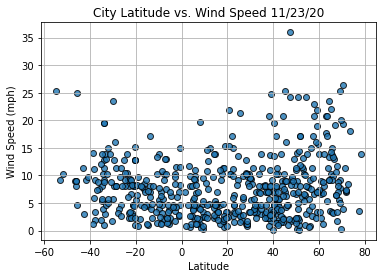

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

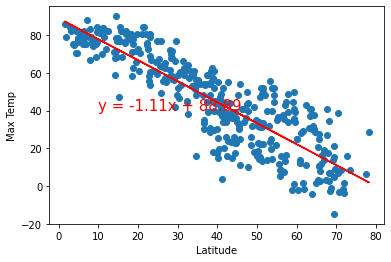

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

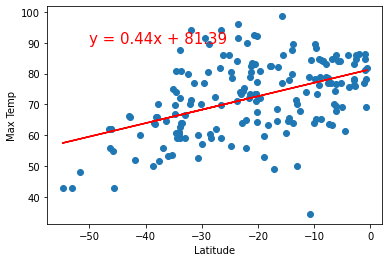

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

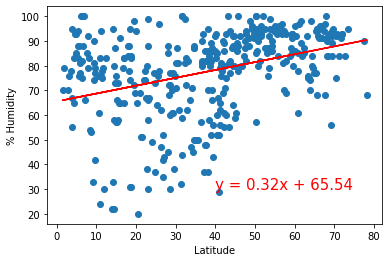

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,30))

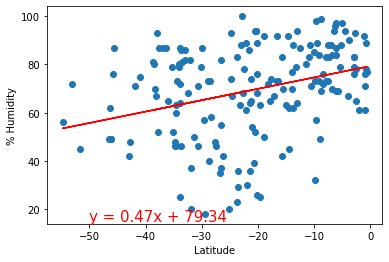

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

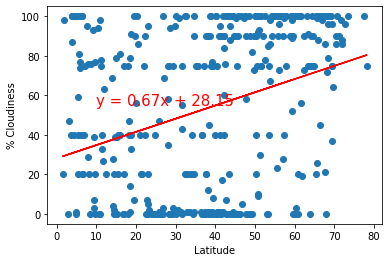

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

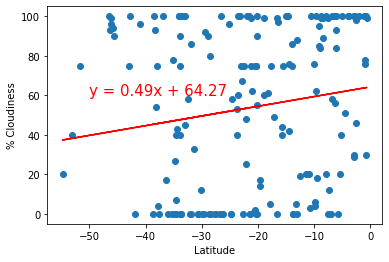

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

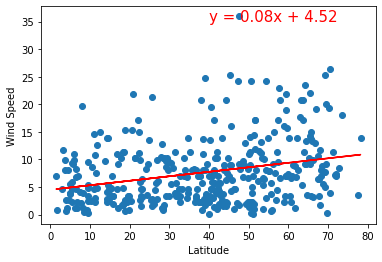

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for Wind Speed', 'Wind Speed',(40,35))

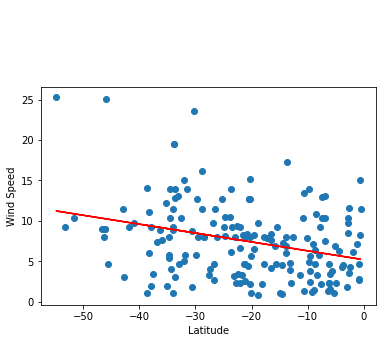

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))